<a href="https://colab.research.google.com/github/hyj378/ArtificialIntelligence/blob/master/Word2Vec_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Word2Vec

In [0]:
! pip install gensim

In [0]:
from gensim.models import word2vec
import matplotlib.pyplot as plt

In [0]:
tf.reset_default_graph() #matplot을 다시 실행하면 오류나서 초기화작업 해야함


#단어와 2차원 x축의 값, y축의 값을 입력받아 2차원 그래프 그리
def plot_2d_graph(vocabs, xs, ys): # word2vec을 생성하는 함수
  plt.figure(figsize=(8,6))
  plt.scatter(xs,ys,marker='o') #산포도 그리기. 점(o)로 찍어서 그림 그리는거
  for i,v in enumerate(vocabs):
    plt.annotate(v, xy=(xs[i], ys[i])) #해당하는 값에 그래프 점 찍기

In [0]:
#여기에 전처리 + 문법단위로 자른 문장들 넣기
sentences = [
              ['today', 'is', 'very', 'nice', 'happy'],
              ['I', 'am', 'very', 'sad'],
              ['this', 'horror', 'movie', 'is', 'very', 'horror'],
              ['I', 'am', 'so', 'tired'],
              ['my', 'mom', 'is', 'very','angry']
            ]

In [0]:
# 문장을 이용하여 단어와 벡터 생성
model = word2vec.Word2Vec(sentences, size=300, window=3, min_count=1, workers=1)

In [0]:
# 단어벡터를 구하기
word_vectors = model.wv

vocabs = word_vectors.vocab.keys()
word_vectors_list = [word_vectors[v] for v in vocabs]

In [0]:
# 단어 유사도 확인
#print(word_vectors.similarity('it', 'this')) #유사도 계산
#word_vectors.most_similar('it') #가장 유사한 단어 출력

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
xys = pca.fit_transform(word_vectors_list)
xs = xys[:,0]
ys = xys[:,1]

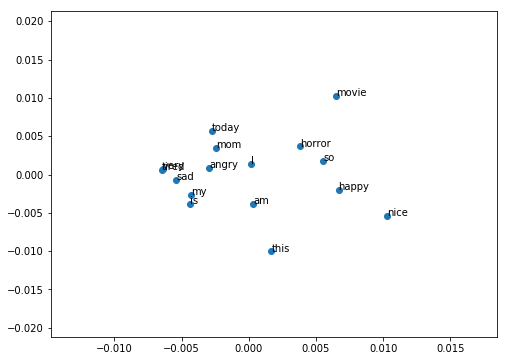

In [144]:
plot_2d_graph(vocabs, xs, ys)

In [151]:
word = 'nice' # tf-idf로 뽑아낸, 입력한 문장에서 가장 영향력이 큰 단어

result={} # 행복, 슬픔, 화남, 공포, 분노당 결과값 저장할 딕셔너리 생성

result['happy'] = word_vectors.similarity(word, 'happy') #유사도 계산
result['sad'] = word_vectors.similarity(word, 'sad') #유사도 계산
result['horror'] = word_vectors.similarity(word, 'horror') #유사도 계산
result['tired'] = word_vectors.similarity(word, 'tired') #유사도 계산
result['angry'] = word_vectors.similarity(word, 'angry') #유사도 계산

for key in result:
  print(key, ":", result[key])

def find_min(x):
  return result[x]

key_min = min(result.keys(), key=(lambda k: result[k]))
print("\n\n[Min]",key_min,result[key_min])
# 지금은 자료가 너무 없어서 결과가 좀 이상하게 나오는거같아요 ㅠ.ㅠ
# 마이너스 값도 나오는데, 그거는 자료 정리한 후 넣어보고 결과봐서 얘기합시당

happy : 0.066170104
sad : -0.098008886
horror : 0.05657835
tired : -0.08539677
angry : -0.01911714


[Min] sad -0.098008886


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [0]:
# 모델 저장
#model.save('word2vec_model.model')